In [1]:
import pandas as pd
import numpy as np
import googlefinance 
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from functools import reduce
import seaborn as sns
from sklearn.metrics import r2_score
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")


df_TSM = pd.read_csv('TSM_2018_2021.csv', usecols = ['Date','Close'], low_memory = False)
adj_TSM_f = df_TSM['Close'].astype(float)
df_TSM['TSM_Close'] = adj_TSM_f 
del df_TSM['Close']
df_TSM


,Date,TSM_Close
0,2018-01-02,41.020000
1,2018-01-03,41.709999
2,2018-01-04,41.490002
3,2018-01-05,42.459999
4,2018-01-08,42.439999
...,...,...
876,2021-06-25,116.529999
877,2021-06-28,119.610001
878,2021-06-29,120.230003
879,2021-06-30,120.160004


In [2]:
df_APPL = pd.read_csv('APPL_2018_2021.csv', usecols = ['Date','Close'], low_memory = False)
#df_TSM.tail(100)
adj_APPL_f = df_APPL['Close'].astype(float)
df_APPL['AAPL_Close'] = adj_APPL_f 
del df_APPL['Close']
df_APPL


,Date,AAPL_Close
0,2018-01-02,43.064999
1,2018-01-03,43.057499
2,2018-01-04,43.257500
3,2018-01-05,43.750000
4,2018-01-08,43.587502
...,...,...
876,2021-06-25,133.110001
877,2021-06-28,134.779999
878,2021-06-29,136.330002
879,2021-06-30,136.960007


In [3]:
df_TSLA = pd.read_csv('TSLA_2018_2021.csv', usecols = ['Date','Close'], low_memory = False)
#df_TSM.tail(100)

adj_TSLA_f = df_TSLA['Close'].astype(float)
df_TSLA['TSLA_Close'] = adj_TSLA_f 
del df_TSLA['Close']
df_TSLA


# df_TSLA['pct_TSLA'] = pct_TSLA
# del df_TSLA['Adj Close']
# df_TSLA


,Date,TSLA_Close
0,2018-01-02,64.106003
1,2018-01-03,63.450001
2,2018-01-04,62.924000
3,2018-01-05,63.316002
4,2018-01-08,67.281998
...,...,...
877,2021-06-28,688.719971
878,2021-06-29,680.760010
879,2021-06-30,679.700012
880,2021-07-01,677.919983


In [4]:
df_AMZN = pd.read_csv('AMZN_2018_2021.csv', usecols = ['Date','Close'], low_memory = False)
#df_TSM.tail(100)

adj_AMZN_f = df_AMZN['Close'].astype(float)
df_AMZN['AMZN_Close'] = adj_AMZN_f 
del df_AMZN['Close']
df_AMZN


,Date,AMZN_Close
0,2018-01-02,1189.010010
1,2018-01-03,1204.199951
2,2018-01-04,1209.589966
3,2018-01-05,1229.140015
4,2018-01-08,1246.869995
...,...,...
876,2021-06-25,3401.459961
877,2021-06-28,3443.889893
878,2021-06-29,3448.139893
879,2021-06-30,3440.159912


In [5]:
df_AMD = pd.read_csv('AMD_2018_2021.csv', usecols = ['Date','Close'], low_memory = False)
#df_TSM.tail(100)

adj_AMD_f = df_AMD['Close'].astype(float)
df_AMD['AMD_Close'] = adj_AMZN_f 
del df_AMD['Close']
df_AMD

,Date,AMD_Close
0,2018-01-02,1189.010010
1,2018-01-03,1204.199951
2,2018-01-04,1209.589966
3,2018-01-05,1229.140015
4,2018-01-08,1246.869995
...,...,...
876,2021-06-25,3401.459961
877,2021-06-28,3443.889893
878,2021-06-29,3448.139893
879,2021-06-30,3440.159912


In [6]:
dfs = [df_TSM, df_APPL, df_TSLA, df_AMZN, df_AMD]

dfs

df_final = reduce(lambda left,right: pd.merge(left,right,on='Date'), dfs)

df_final.tail(1000)

,Date,TSM_Close,AAPL_Close,TSLA_Close,AMZN_Close,AMD_Close
0,2018-01-02,41.020000,43.064999,64.106003,1189.010010,1189.010010
1,2018-01-03,41.709999,43.057499,63.450001,1204.199951,1204.199951
2,2018-01-04,41.490002,43.257500,62.924000,1209.589966,1209.589966
3,2018-01-05,42.459999,43.750000,63.316002,1229.140015,1229.140015
4,2018-01-08,42.439999,43.587502,67.281998,1246.869995,1246.869995
...,...,...,...,...,...,...
876,2021-06-25,116.529999,133.110001,671.869995,3401.459961,3401.459961
877,2021-06-28,119.610001,134.779999,688.719971,3443.889893,3443.889893
878,2021-06-29,120.230003,136.330002,680.760010,3448.139893,3448.139893
879,2021-06-30,120.160004,136.960007,679.700012,3440.159912,3440.159912


/Users/freyahu/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/freyahu/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/freyahu/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error o

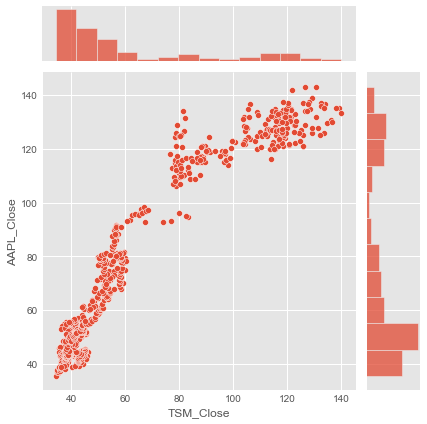

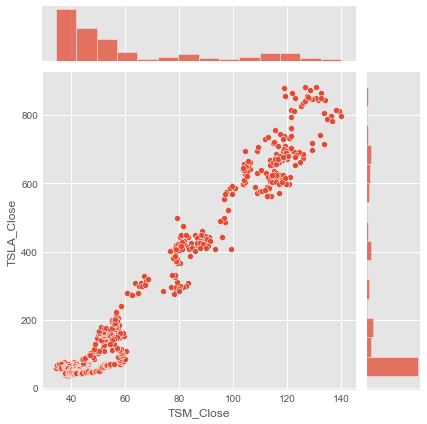

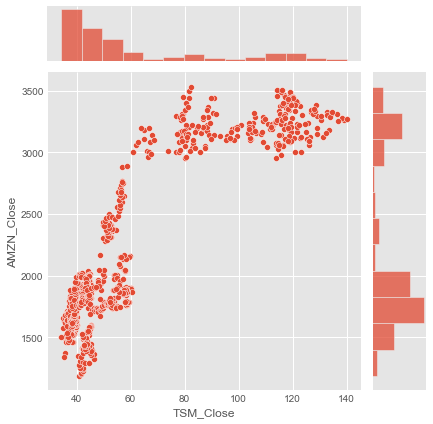

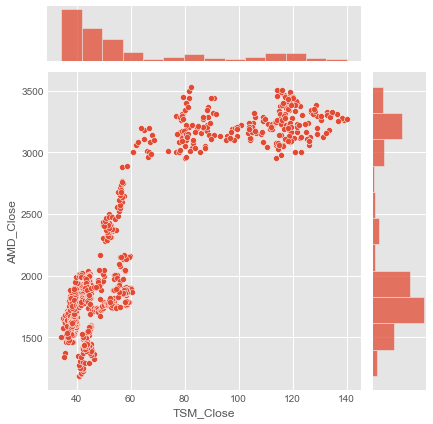

In [7]:
#APPL and TSM scatter correlation

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

sns.jointplot('TSM_Close', 'AAPL_Close', df_final, kind='scatter')
sns.jointplot('TSM_Close', 'TSLA_Close', df_final, kind='scatter')
sns.jointplot('TSM_Close', 'AMZN_Close', df_final, kind='scatter')
sns.jointplot('TSM_Close', 'AMD_Close', df_final, kind='scatter')

In [8]:
#APPL and TSM r2 

a = adj_APPL_f.tail(800)
b = adj_TSM_f.tail(800)

correlation_matrix = np.corrcoef(a, b)
correlation_matrix
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
r_squared

0.9151419666696939

In [9]:
#APPL and TSLA r2 square
x = adj_APPL_f.tail(800)
y = adj_TSLA_f.tail(800)

correlation_matrix = np.corrcoef(x, y)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
r_squared


0.8938423628384696

In [10]:
#TSM and TSLA r2 
c = adj_TSM_f.tail(800)
d = adj_TSLA_f.tail(800)


correlation_matrix = np.corrcoef(c, d)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
r_squared

0.9597223080411373

In [11]:
#TSM and AMZN r2 
c = adj_TSM_f.tail(800)
d = adj_AMZN_f.tail(800)


correlation_matrix = np.corrcoef(c, d)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
r_squared

0.81976083195708

In [12]:
#TSM and AMD r2 
c = adj_TSM_f.tail(800)
d = adj_AMD_f.tail(800)


correlation_matrix = np.corrcoef(c, d)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
r_squared


0.846180091680458